<a href="https://colab.research.google.com/github/ThinhNguyen209/CS114.K21.KHTN/blob/master/Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORT LIBRARIES

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder



#LOAD DATASET

In [3]:
from google.colab import files 
file = files.upload()

Saving datasets_478_974_mushrooms.csv to datasets_478_974_mushrooms.csv


Attribute information dataset:

|classes    |cap-shape |cap-surface|cap-color |bruises   |odor      |gill-attachment|gill-spacing|gill-size|gill-color |stalk-shape |stalk-root   |stalk-surface-above-ring|stalk-surface-below-ring|stalk-color-above-ring|stalk-color-below-ring|veil-type  |veil-color|ring-number|ring-type   |spore-print-color|population |
|-----------|----------|-----------|----------|----------|----------|---------------|------------|---------|-----------|------------|-------------|------------------------|------------------------|----------------------|----------------------|-----------|----------|-----------|------------|-----------------|-----------|
|edible=e   | bell=b   | fibrous=f | brown=n  | bruises=t| almond=a | attached=a    | close=c    | broad=b | black=k   | enlarging=e| bulbous=b   | fibrous=f              | fibrous=f              | brown=n              | brown=n              | partial=p | brown=n  | none=n    | cobwebby=c | black=k         | abundant=a|
|poisonous=p|conical=c |grooves=g  |buff=b    |no=f      |anise=l   |descending=d   |crowded=w   |narrow=n |brown=n    |tapering=t  |club=c       |scaly=y                 |scaly=y                 |buff=b                |buff=b                |universal=u|orange=o  |one=o      |evanescent=e|brown=n          |clustered=c|
|           |convex=x  |scaly=y    |cinnamon=c|bruises   |creosote=c|free=f         |distant=d   |gill-size|buff=b     |stalk-shape |cup=u        |silky=k                 |silky=k                 |cinnamon=c            |cinnamon=c            |veil-type  |white=w   |two=t      |flaring=f   |buff=b           |numerous=n |
|           |flat=f    |smooth=s   |gray=g    | bruises=t|fishy=y   |notched=n      |gill-spacing| broad=b |chocolate=h| enlarging=e|equal=e      |smooth=s                |smooth=s                |gray=g                |gray=g                | partial=p |yellow=y  |ring-number|large=l     |chocolate=h      |scattered=s|
|           | knobbed=k|cap-surface|green=r   |no=f      |foul=f    |gill-attachment| close=c    |narrow=n |gray=g     |tapering=t  |rhizomorphs=z|stalk-surface-above-ring|stalk-surface-below-ring|orange=o              |orange=o              |universal=u|veil-color| none=n    |none=n      |green=r          |several=v  |
|           |sunken=s  | fibrous=f |pink=p    |bruises   |musty=m   | attached=a    |crowded=w   |gill-size| green=r   |stalk-shape |rooted=r     | fibrous=f              | fibrous=f              |pink=p                |pink=p                |veil-type  | brown=n  |one=o      |pendant=p   |orange=o         |solitary=y |


In [4]:
link = "/content/datasets_478_974_mushrooms.csv"
dataset = read_csv(link)
dataset

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


#SUMMARIZE THE DATASET

In [5]:
# shape
print(dataset.shape)

(8124, 23)


In [6]:
# head
print(dataset.head(20))

   class cap-shape cap-surface  ... spore-print-color population habitat
0      p         x           s  ...                 k          s       u
1      e         x           s  ...                 n          n       g
2      e         b           s  ...                 n          n       m
3      p         x           y  ...                 k          s       u
4      e         x           s  ...                 n          a       g
5      e         x           y  ...                 k          n       g
6      e         b           s  ...                 k          n       m
7      e         b           y  ...                 n          s       m
8      p         x           y  ...                 k          v       g
9      e         b           s  ...                 k          s       m
10     e         x           y  ...                 n          n       g
11     e         x           y  ...                 k          s       m
12     e         b           s  ...                

In [7]:
# descriptions
print(dataset.describe())

       class cap-shape cap-surface  ... spore-print-color population habitat
count   8124      8124        8124  ...              8124       8124    8124
unique     2         6           4  ...                 9          6       7
top        e         x           y  ...                 w          v       d
freq    4208      3656        3244  ...              2388       4040    3148

[4 rows x 23 columns]


In [8]:
# class distribution
print(dataset.groupby('class').size())

class
e    4208
p    3916
dtype: int64


In [12]:
#Label encoding
for col in dataset.columns:
  dataset[col] = LabelEncoder().fit_transform(dataset[col])
dataset

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,0,0,2,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,1,0,2,1,7,7,0,2,1,0,7,4,2


#DATA VISUALIZATION

In [55]:
#Show features
feature_columns = dataset.columns[1:]
for i, f in zip(np.arange(1, len(feature_columns) +1), feature_columns):
  print('feature {:d}:\t{}'.format(i, f))

feature 1:	cap-shape
feature 2:	cap-surface
feature 3:	cap-color
feature 4:	bruises
feature 5:	odor
feature 6:	gill-attachment
feature 7:	gill-spacing
feature 8:	gill-size
feature 9:	gill-color
feature 10:	stalk-shape
feature 11:	stalk-root
feature 12:	stalk-surface-above-ring
feature 13:	stalk-surface-below-ring
feature 14:	stalk-color-above-ring
feature 15:	stalk-color-below-ring
feature 16:	veil-type
feature 17:	veil-color
feature 18:	ring-number
feature 19:	ring-type
feature 20:	spore-print-color
feature 21:	population
feature 22:	habitat


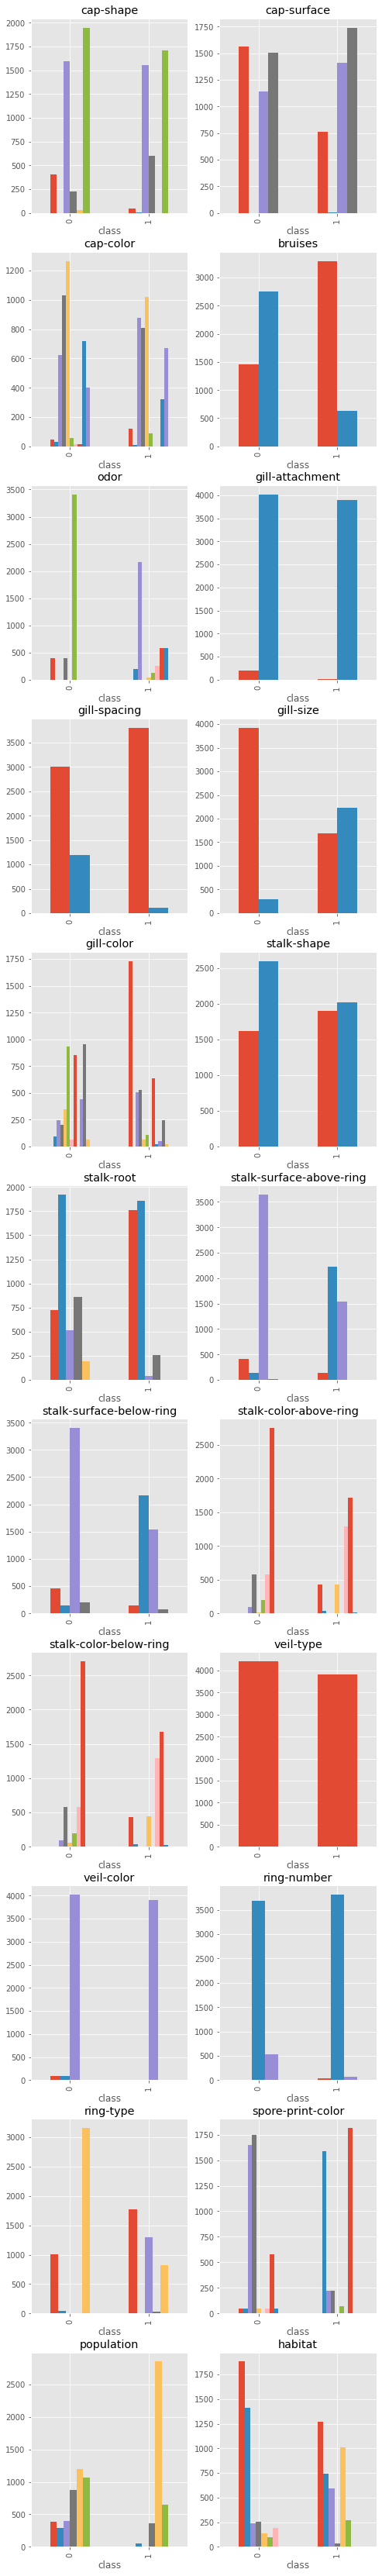

In [61]:
#Draw histogram
plt.style.use('ggplot')

fig, axes = plt.subplots(nrows=11, ncols=2, figsize=(8, 60))
dataset['id'] = np.arange(1, dataset.shape[0] + 1)

for f, ax in zip(feature_columns, axes.ravel()):
  dataset.groupby(['class', f])['id'].count().unstack(f).plot(kind='bar', ax=ax, legend=False, grid=True, title=f)

#EVALUATE SOME ALGORITHMS

In [15]:
#Split-out valiation dataset

x =  dataset.drop('class', axis=1)
y = dataset['class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1 )

In [16]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.947989 (0.011649)
LDA: 0.944451 (0.008705)
KNN: 0.998769 (0.001341)
CART: 1.000000 (0.000000)
NB: 0.921368 (0.014485)
SVM: 0.999846 (0.000462)


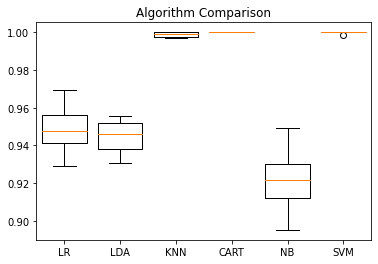

In [29]:
# Compare Algorithms
pyplot.boxplot(results, labels=names, widths=0.8)
pyplot.title('Algorithm Comparison')
pyplot.show()


The results show: SVM has the highest accuracy. So I choose SVM to make predictions 

#MAKE PREDICTIONS

In [30]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(x_train, y_train)
predictions = model.predict(x_test)
# Evaluate predictions
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

1.0
[[820   0]
 [  0 805]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       820
           1       1.00      1.00      1.00       805

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

